In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier




In [2]:
print(train_df:=pd.read_csv("train.csv"))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
test_df=pd.read_csv("test.csv")
test_df
#print(test_df:=pd.read_csv("test.csv"))



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
print(ID:=test_df["PassengerId"])

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

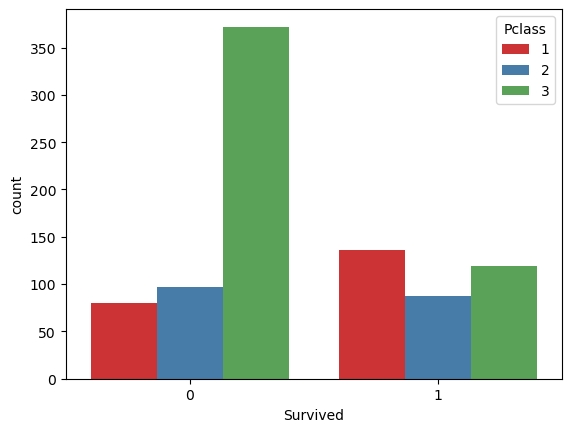

In [11]:
#Pclass
sns.countplot(x="Survived",hue="Pclass",data=train_df,palette="Set1")

<Axes: xlabel='Survived', ylabel='count'>

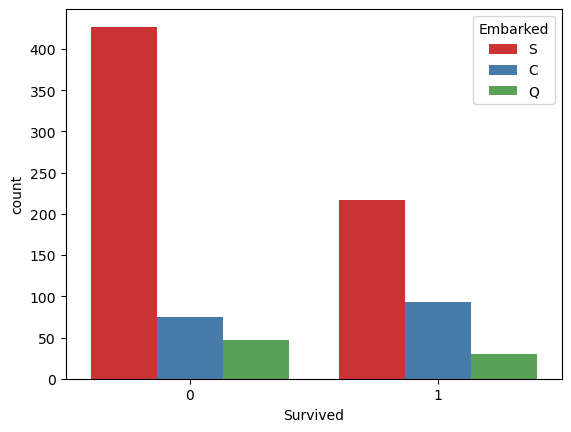

In [12]:
#Embarked
sns.countplot(x="Survived",hue="Embarked",data=train_df,palette="Set1")

[]

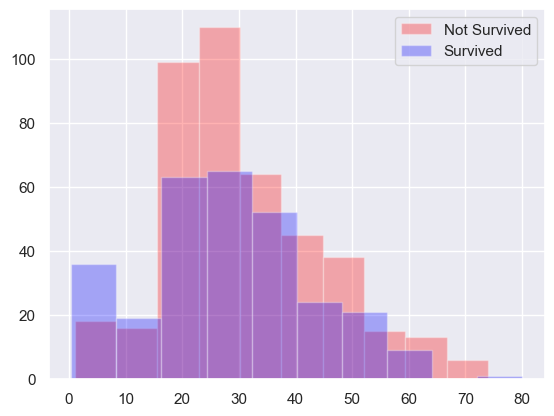

In [13]:
#Age
sns.set()
plt.hist(train_df[train_df["Survived"]==0].Age,color="red",alpha=0.3,label="Not Survived")
plt.hist(train_df[train_df["Survived"]==1].Age,color="blue",alpha=0.3,label="Survived")
plt.legend()
plt.plot()

<Axes: xlabel='Survived', ylabel='count'>

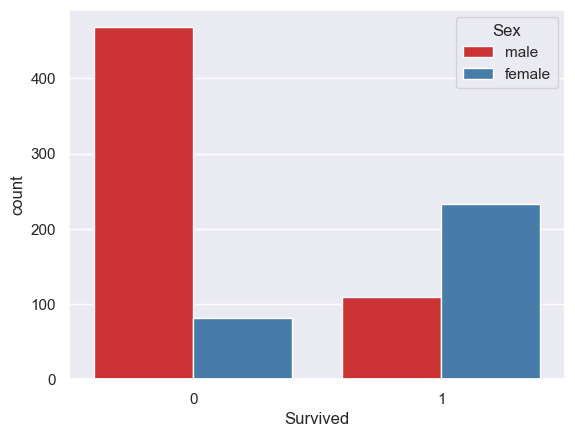

In [14]:
#Sex
sns.countplot(x="Survived",hue="Sex",data=train_df,palette="Set1")

<Axes: xlabel='Survived', ylabel='count'>

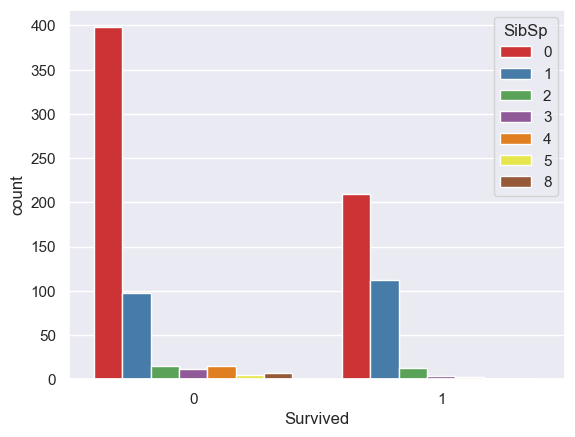

In [15]:
#SibSp
sns.countplot(x="Survived",hue="SibSp",data=train_df,palette="Set1")

<Axes: xlabel='Survived', ylabel='count'>

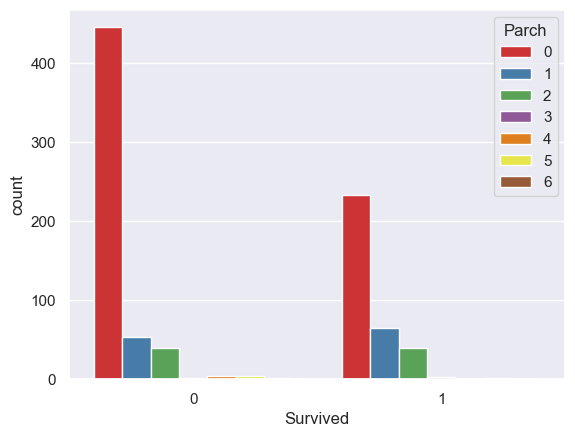

In [16]:
#Parch
sns.countplot(x="Survived",hue="Parch",data=train_df,palette="Set1")

[]

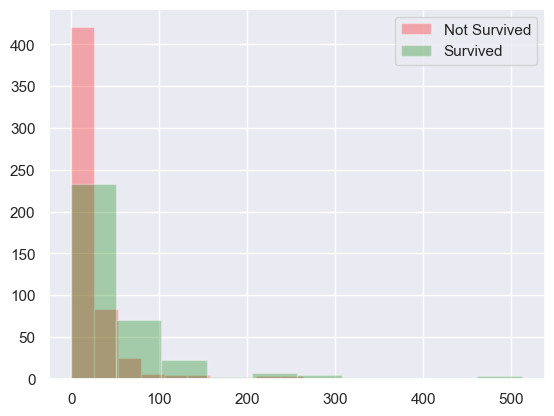

In [17]:
#Fare
sns.set()
plt.hist(train_df[train_df["Survived"]==0].Fare,color="red",alpha=0.3,label="Not Survived")
plt.hist(train_df[train_df["Survived"]==1].Fare,color="green",alpha=0.3,label="Survived")
plt.legend()
plt.plot()

#Embarked
sns.countplot(x="Survived",hue="Embarked",data=train_df,palette="Set1")

In [18]:
#Cabin
# sns.set()
# plt.hist(train_df[train_df["Survived"]==0].Cabin,color="red",alpha=0.3,label="Not Survived")
# plt.hist(train_df[train_df["Survived"]==1].Cabin,color="green",alpha=0.3,label="Survived")
# plt.legend()
# plt.plot()

# Data preprocessing

In [19]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


[]

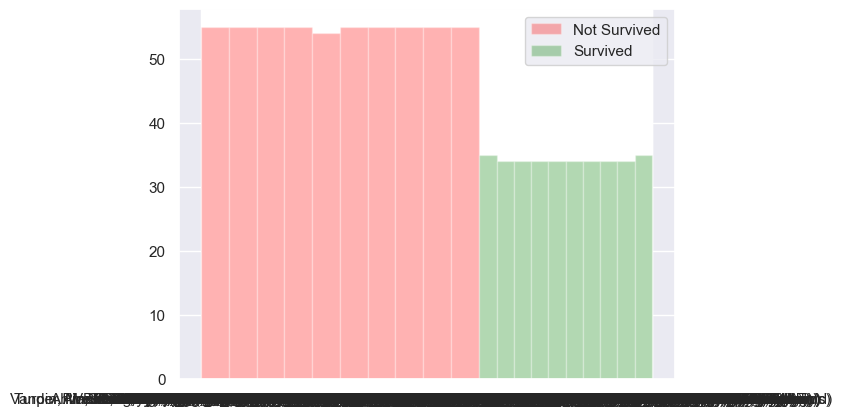

In [20]:
sns.set()
plt.hist(train_df[train_df["Survived"]==0].Name,color="red",alpha=0.3,label="Not Survived")
plt.hist(train_df[train_df["Survived"]==1].Name,color="green",alpha=0.3,label="Survived")
plt.legend()
plt.plot()

In [21]:
#missing data percentage (Testing)
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


In [22]:
train_df.drop(["Cabin","PassengerId","Ticket","Name"], axis = 1, inplace = True)
test_df.drop(["Cabin","PassengerId","Ticket","Name"], axis = 1, inplace = True)


In [23]:
feats = ["Sex","Pclass","Embarked"]
le = LabelEncoder()
df = pd.concat([train_df, test_df])
for f in feats:
    le.fit(df[f])
    train_df[f] = le.transform(train_df[f])
    test_df[f] = le.transform(test_df[f])

In [24]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,2
887,1,0,0,19.0,0,0,30.0000,2
888,0,2,0,NaN,1,2,23.4500,2
889,1,0,1,26.0,0,0,30.0000,0


In [25]:
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"].copy()

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
xg = XGBClassifier(max_depth=5)
xg.fit(X_Train,y_Train)
y_pred = xg.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.8100558659217877

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [29]:
#fill missing values of ‘Age’ with the median
df = pd.concat([train_df,test_df])
median = df["Age"].median()

for dataset in [train_df,test_df]:
    dataset["Age"] = dataset["Age"].fillna(median) 

In [30]:
#fill missing values of ‘Embarked’ with the mode
mode = train_df["Embarked"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(mode[0])

In [31]:
#fill missing values of ‘Fare’ with the median
median = train_df["Fare"].median()

for dataset in [train_df,test_df]:
    dataset["Fare"] = dataset["Fare"].fillna(median) 

# FEATURE ENGINEERING

In [32]:
c

NameError: name 'c' is not defined

In [ ]:
for dataset in [train_df,test_df]:
    dataset["Alone"] = dataset["Relatives"] == 0
#We can add a feature of being less than 20 years old as that it has a different pattern in the histogram


In [ ]:
for dataset in [train_df,test_df]:
    dataset["Young"] = dataset["Age"] <= 15

In [ ]:
for dataset in [train_df,test_df]:
    dataset["Fare_Per_Person"] = dataset["Fare"]/(dataset["Relatives"]+1) 
    
    

In [ ]:
train_df

In [ ]:
train_df["Fare"] = np.log(train_df["Fare"]+0.001)
test_df["Fare"] = np.log(test_df["Fare"]+0.001)
#Almost mean == median, so it is more normally distributed
train_df["Fare"].hist()

In [ ]:
#Aggregations
train_df["Mean_FarePerPclass"] = train_df["Pclass"].map(dict(train_df.groupby("Pclass")["Fare"].mean()))
test_df["Mean_FarePerPclass"] = test_df["Pclass"].map(dict(test_df.groupby("Pclass")["Fare"].mean()))
#We can Add ‘Parch’ and "SibSp" to give us the number of relatives

OUTLIERS:

In [ ]:
z_scores = stats.zscore(train_df["Fare"])
absolute_z_score = np.abs(z_scores)
is_outlier = absolute_z_score >= 2

for x in range(0,train_df["Fare"].size):
    if (is_outlier[x] == True ):
        train_df.drop(axis=1, index=x,inplace=True)

# Scaling Numerical Data

In [ ]:
Scaler = StandardScaler()
train_df[["Age","Fare","Fare_Per_Person"]] = Scaler.fit_transform(train_df[["Age","Fare","Fare_Per_Person"]])
test_df[["Age","Fare","Fare_Per_Person"]] = Scaler.transform(test_df[["Age","Fare","Fare_Per_Person"]])

# Encoding
# Label Encoder

In [ ]:
train_df

In [ ]:
feats = ["Alone","Young","Sex","Embarked","Pclass"]
le = LabelEncoder()
df = pd.concat([train_df, test_df])
for f in feats:
    le.fit(df[f])
    train_df[f] = le.transform(train_df[f])
    test_df[f] = le.transform(test_df[f])

In [ ]:
train_df

In [ ]:
test_df

ML Modeling

Evaluating on the test set


Hold out validation

In [ ]:
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"].copy()

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
train_df

In [ ]:
X

In [ ]:
X_Train

In [ ]:
X_Test

In [ ]:
y

In [ ]:
y_Train

In [ ]:
y_Test

In [ ]:
test_df

In [ ]:
prediction=pd.read_csv("gender_submission.csv")

pred=prediction["Survived"].copy()


In [ ]:
prediction

In [ ]:
pred

In [ ]:
xg = XGBClassifier(max_depth=3)
xg.fit(X_Train,y_Train)
y_pred = xg.predict(X_Test)
accuracy_score(y_pred,y_Test)

In [ ]:
# xg = XGBClassifier(max_depth=5)
# xg.fit(X,test_df)
# my_pred = xg.predict(test_df)
# accuracy_score(my_pred,pred)

In [ ]:
from sklearn.model_selection import KFold
X = train_df.drop("Survived",axis=1).values
y = train_df["Survived"].values
scores = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X,y):
  X_Train, y_Train = X[train_index], y[train_index]
  X_Test, y_Test = X[test_index], y[test_index]
  
  xg = XGBClassifier(max_depth=3)
  xg.fit(X_Train,y_Train)
  y_pred = xg.predict(X_Test)
  scores.append(accuracy_score(y_pred,y_Test))
  print(accuracy_score(y_pred,y_Test))
    
print("Mean:",np.mean(scores))

In [ ]:
X = train_df.drop("Survived",axis=1)
Y = train_df["Survived"].copy()
xg = XGBClassifier(max_depth=5)
xg.fit(X, y)
test_df["Survived"] = xg.predict(test_df)
submission = pd.DataFrame({"PassengerId": ID ,"Survived": test_df["Survived"]})
submission.to_csv("TitanicSurvivals.csv",index=False)

In [ ]:
feats=train_df.drop("Survived",axis=1).columns
imp=xg.feature_importances_
dd=pd.DataFrame()
dd["Name"]=feats.copy()
dd["importance"]=imp
dd